In [0]:
import altair as alt
import pandas as pd
import numpy as np
from IPython.display import Image

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
alt.data_transformers.enable('default', max_rows=None) 

DataTransformerRegistry.enable('default')

Background - #F3F7F7
Title - #3A3F4A, 36px
Caption - #5D646F, 12px
Axis text - #5D646F, 12 px
Legend title & text - #5D646F, 12 px
Font Family - Ubuntu Mono
Color scale #67001f, #f7f7f7, #053061

In [0]:
background_color = '#F3F7F7'
title_color = '#3A3F4A'
title_size = 36

caption_color = '#5D646F'
caption_size = 12
axis_text_color = '#5D646F'
axis_text_size = 12
legend_title_and_text_color = '#5D646F'
legend_title_and_text_size = 12

font_family = 'Ubuntu Mono'
color_scale = ['#67001f', '#f7f7f7', '#053061']

In [7]:
df = pd.read_csv('/content/drive/My Drive/rate.csv')
df.head()

,region,year,rate
0,Crimea,1990,2.5
1,Vinnytsia,1990,-2.1
2,Volyn,1990,4.0
3,Dnipropetrovsk,1990,0.5
4,Donetsk,1990,-1.2


In [8]:
chart = alt.Chart(df,width=800, height=450).mark_rect().encode(
    alt.X('year:O', axis = alt.Axis(
        values=[str(y) for y in df.year.unique()[::5]],
        title = None, 
        orient='top',
        domain = False),
        ),
    alt.Y('region:N',
          sort=alt.EncodingSortField(
            field="rate",
            op="sum",
            order="descending"), 
          axis = alt.Axis(
              title = None, 
              orient='right',
              domain = False
              ),
          ),
    fill = alt.Color('rate', legend=None,
              scale=alt.Scale(domain=[-15, 15], range = color_scale)
              ), 
    stroke=alt.Color('rate', legend=None,
              scale=alt.Scale(domain=[-15, 15], range = color_scale)
              ), 
)

legend = alt.Chart(pd.DataFrame({'rate': list(range(-15,9))}),width=785, height=7,).mark_rect().encode(
    alt.X('rate:O', axis = alt.Axis(
        title = "population growth rate, per 1000", 
        titleAnchor = 'start',
        titleFontSize = caption_size,
        titleColor = caption_color,
        titleFont=font_family,
        titleOpacity = 0.8,
        titleY = -25,
        titleX = -1,
        values = [-15, -8, 0, 8],
        ticks=False),
    ),
    fill = alt.Color('rate', 
                     scale=alt.Scale(domain=[-15, 15], range = color_scale), 
                     legend=None
              ), 
    stroke=alt.Color('rate',
                     scale=alt.Scale(domain=[-15, 15], range = color_scale), 
                     legend=None
              ), 
)

lower_subtitle = alt.Chart(
    {"values": [{"text": "Data: State Statistics Service of Ukraine"}]}
).mark_text(size=caption_size, align='left', font = font_family, color = caption_color, dx = 545, dy= -3, opacity=0.8).encode(
    text="text:N"
)

(legend & chart & lower_subtitle).properties(background = background_color,
                title = 'Population growth rate by region',
                padding={'top': 40, 'left': 45, 'right': 60, 'bottom':30},
).configure_axis(labelAngle=0,
        grid= False, 
        ticks=False, 
        domain=False,
        labelPadding=5,
        labelFont= font_family,
        labelColor=axis_text_color,
        labelFontSize=axis_text_size,
        labelOpacity=0.8,
).configure_view(
    stroke=None,
    # strokeWidth = 10,
).configure_title(
    fontSize=title_size,
    font=font_family,
    anchor='start',
    color=title_color,
)

alt.VConcatChart(...)

original


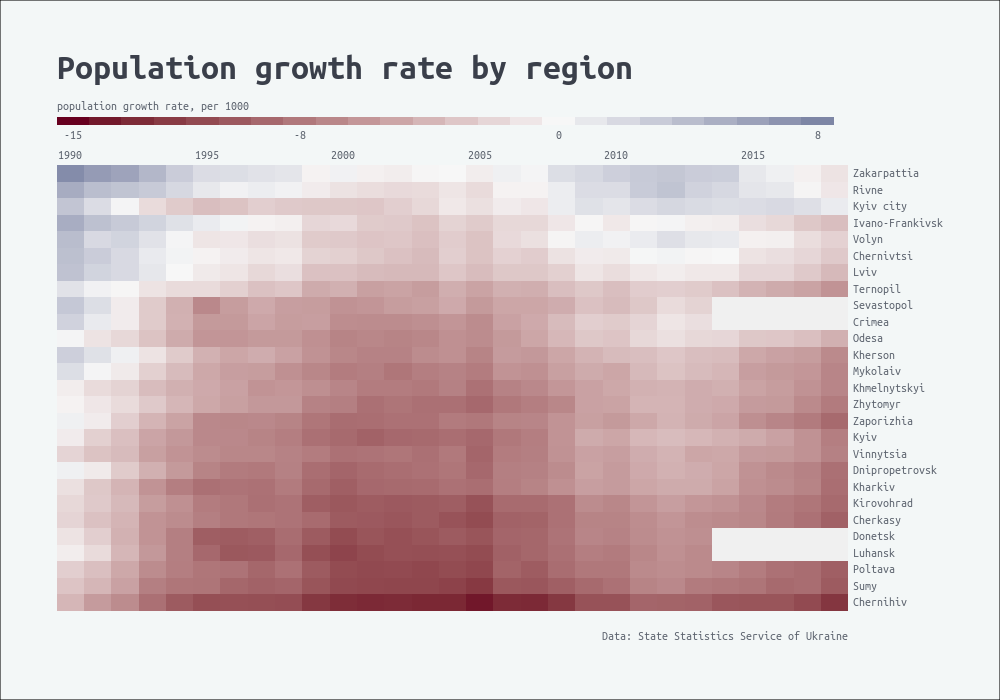

In [9]:
print('original')
Image('/content/drive/My Drive/rate.png')